# Clustering the Countries for HELP International
<hr>

**Objective:**<br>
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

**About organization:**<br>
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

**Problem Statement:**<br>
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [1]:
cd /home/jimmyelly/Documents/IBM-Machine-Learning/Country

/home/jimmyelly/Documents/IBM-Machine-Learning/Country


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from deepchecks.suites import single_dataset_integrity
import notebook_as_pdf
import warnings
warnings.filterwarnings('ignore')
sns.set_style('ticks')
sns.set_palette('BrBG_r')
data_desc = pd.read_csv('data-dictionary.csv')
data_desc

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [3]:
data_desc['Description'][9]

'The GDP per capita. Calculated as the Total GDP divided by the total population.'

In [3]:
data = pd.read_csv('Country-data.csv')
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


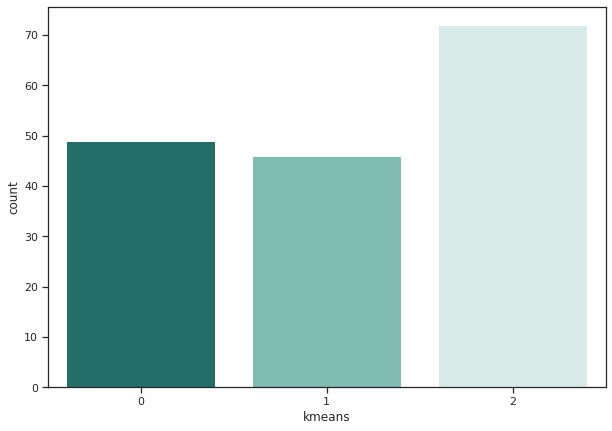

In [63]:
sns.countplot(x=data['kmeans'],data=data)

### After I have definitely ingested my dataset.Lets get to check some dataset features
- I have check out all the necessary information from dataset. so to have a bigger picture of the necessary steps for data preprocessing

In [4]:
suite = single_dataset_integrity()
suite.run(data)

Single Dataset Integrity Suite:   0%|          | 0/8 [00:00<?, ? Check/s]

In [5]:
data.sort_values(by=['gdpp']).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482


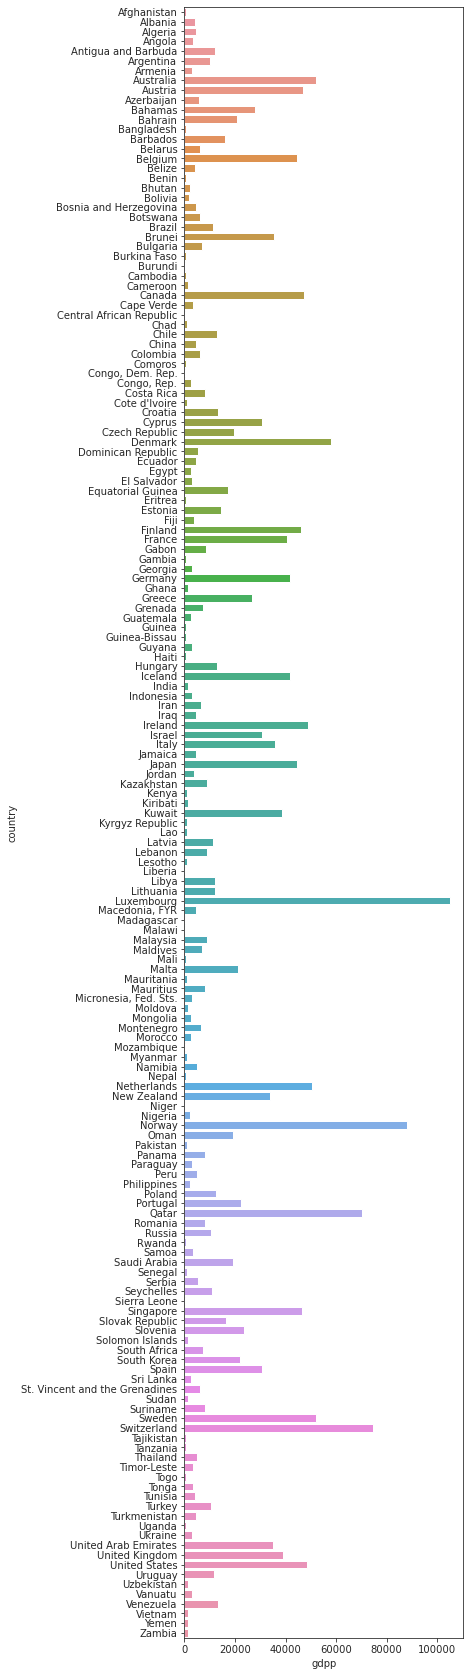

In [6]:
fig =  plt.figure(figsize=(5,30),frameon=True)
sns.barplot(y=data['country'],x=data['gdpp'],data=data)

### The Country with the highest GDP was observed to be:
- Was observed to be **Luxemburg** with GDP above 100000
- 

In [7]:
data.shape

(167, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
#check missing values
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
#lets check where this null values are in the dataset
data[data['inflation'].isnull()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [114]:
data[data['kmeans'] == 0].sort_values(by='gdpp',ascending =True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,agglom,DBSCAN
26,Burundi,1.311779,-1.922135,1.746991,-0.098370,-2.020963,0.797082,-1.449916,1.912012,-2.042565,0,0,-1
88,Liberia,1.268863,-0.843696,1.820021,1.471117,-2.092281,0.108473,-1.100286,1.381190,-1.810927,0,0,-1
37,"Congo, Dem. Rep.",1.507834,0.285385,0.399588,0.328902,-2.205787,1.269298,-1.472473,2.019264,-1.796801,0,0,-1
112,Niger,1.561440,-0.624650,-0.604575,0.310461,-1.969281,-0.465118,-1.325854,2.355588,-1.769413,0,0,3
132,Sierra Leone,1.802336,-1.029281,2.294716,-0.329262,-1.639301,1.096819,-1.754433,1.464691,-1.678175,0,0,-1
93,Madagascar,0.939671,-0.450638,-1.112133,0.069361,-1.532894,0.504277,-1.100286,1.176220,-1.655162,0,0,3
106,Mozambique,1.381261,-0.109859,-0.586317,0.199732,-1.871244,0.384864,-1.810825,1.624656,-1.645537,0,0,3
31,Central African Republic,1.737049,-1.532871,-1.035452,-0.803446,-1.898337,-0.622802,-2.600313,1.469258,-1.603860,0,0,-1
94,Malawi,1.281042,-0.585657,-0.082410,-0.308455,-1.777371,0.782602,-1.968722,1.514534,-1.584682,0,0,-1
50,Eritrea,0.831376,-2.744396,-1.517449,-1.033178,-1.515476,0.745414,-0.998780,1.181277,-1.552045,0,0,-1


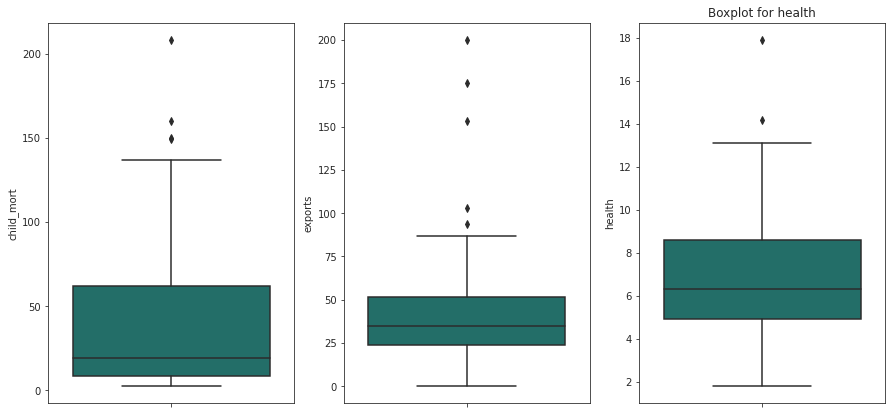

In [12]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,7))
sns.set_context('notebook')
sns.boxplot(y=data['child_mort'],data=data,ax=ax1)
sns.boxplot(y=data['exports'],data=data,ax=ax2)
ax3.set(title = 'Boxplot for health')
sns.boxplot(y=data['health'],data=data,ax=ax3)

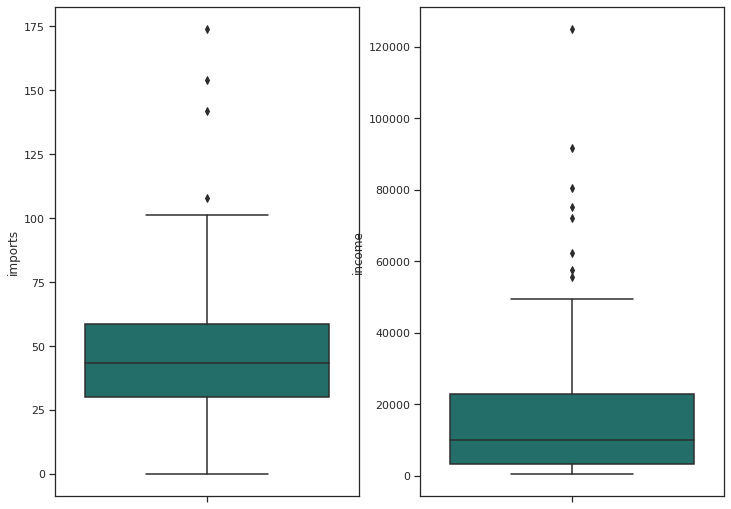

In [13]:
fig,(ax4,ax5) = plt.subplots(1,2,figsize=(12,9))
sns.boxplot(y=data['imports'],data=data,ax=ax4)
sns.boxplot(y=data['income'],data=data,ax=ax5)

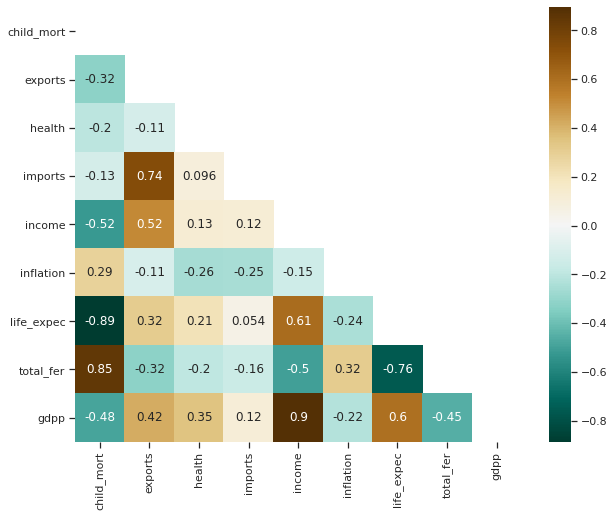

In [14]:
fig = plt.figure(figsize=(10,8))
corr_mat = data.corr()
mat =  np.triu(corr_mat)
sns.heatmap(corr_mat,annot=True,cmap='BrBG_r',mask=mat)

In [15]:
columns = [x for x in data.columns if x not in 'country']

for x in range(len(columns)):
    corr_mat.iloc[x,x] = 0.0

In [16]:
corr_mat.abs().idxmax().sort_values(ascending=True)

life_expec    child_mort
total_fer     child_mort
imports          exports
health              gdpp
income              gdpp
exports          imports
gdpp              income
child_mort    life_expec
inflation      total_fer
dtype: object

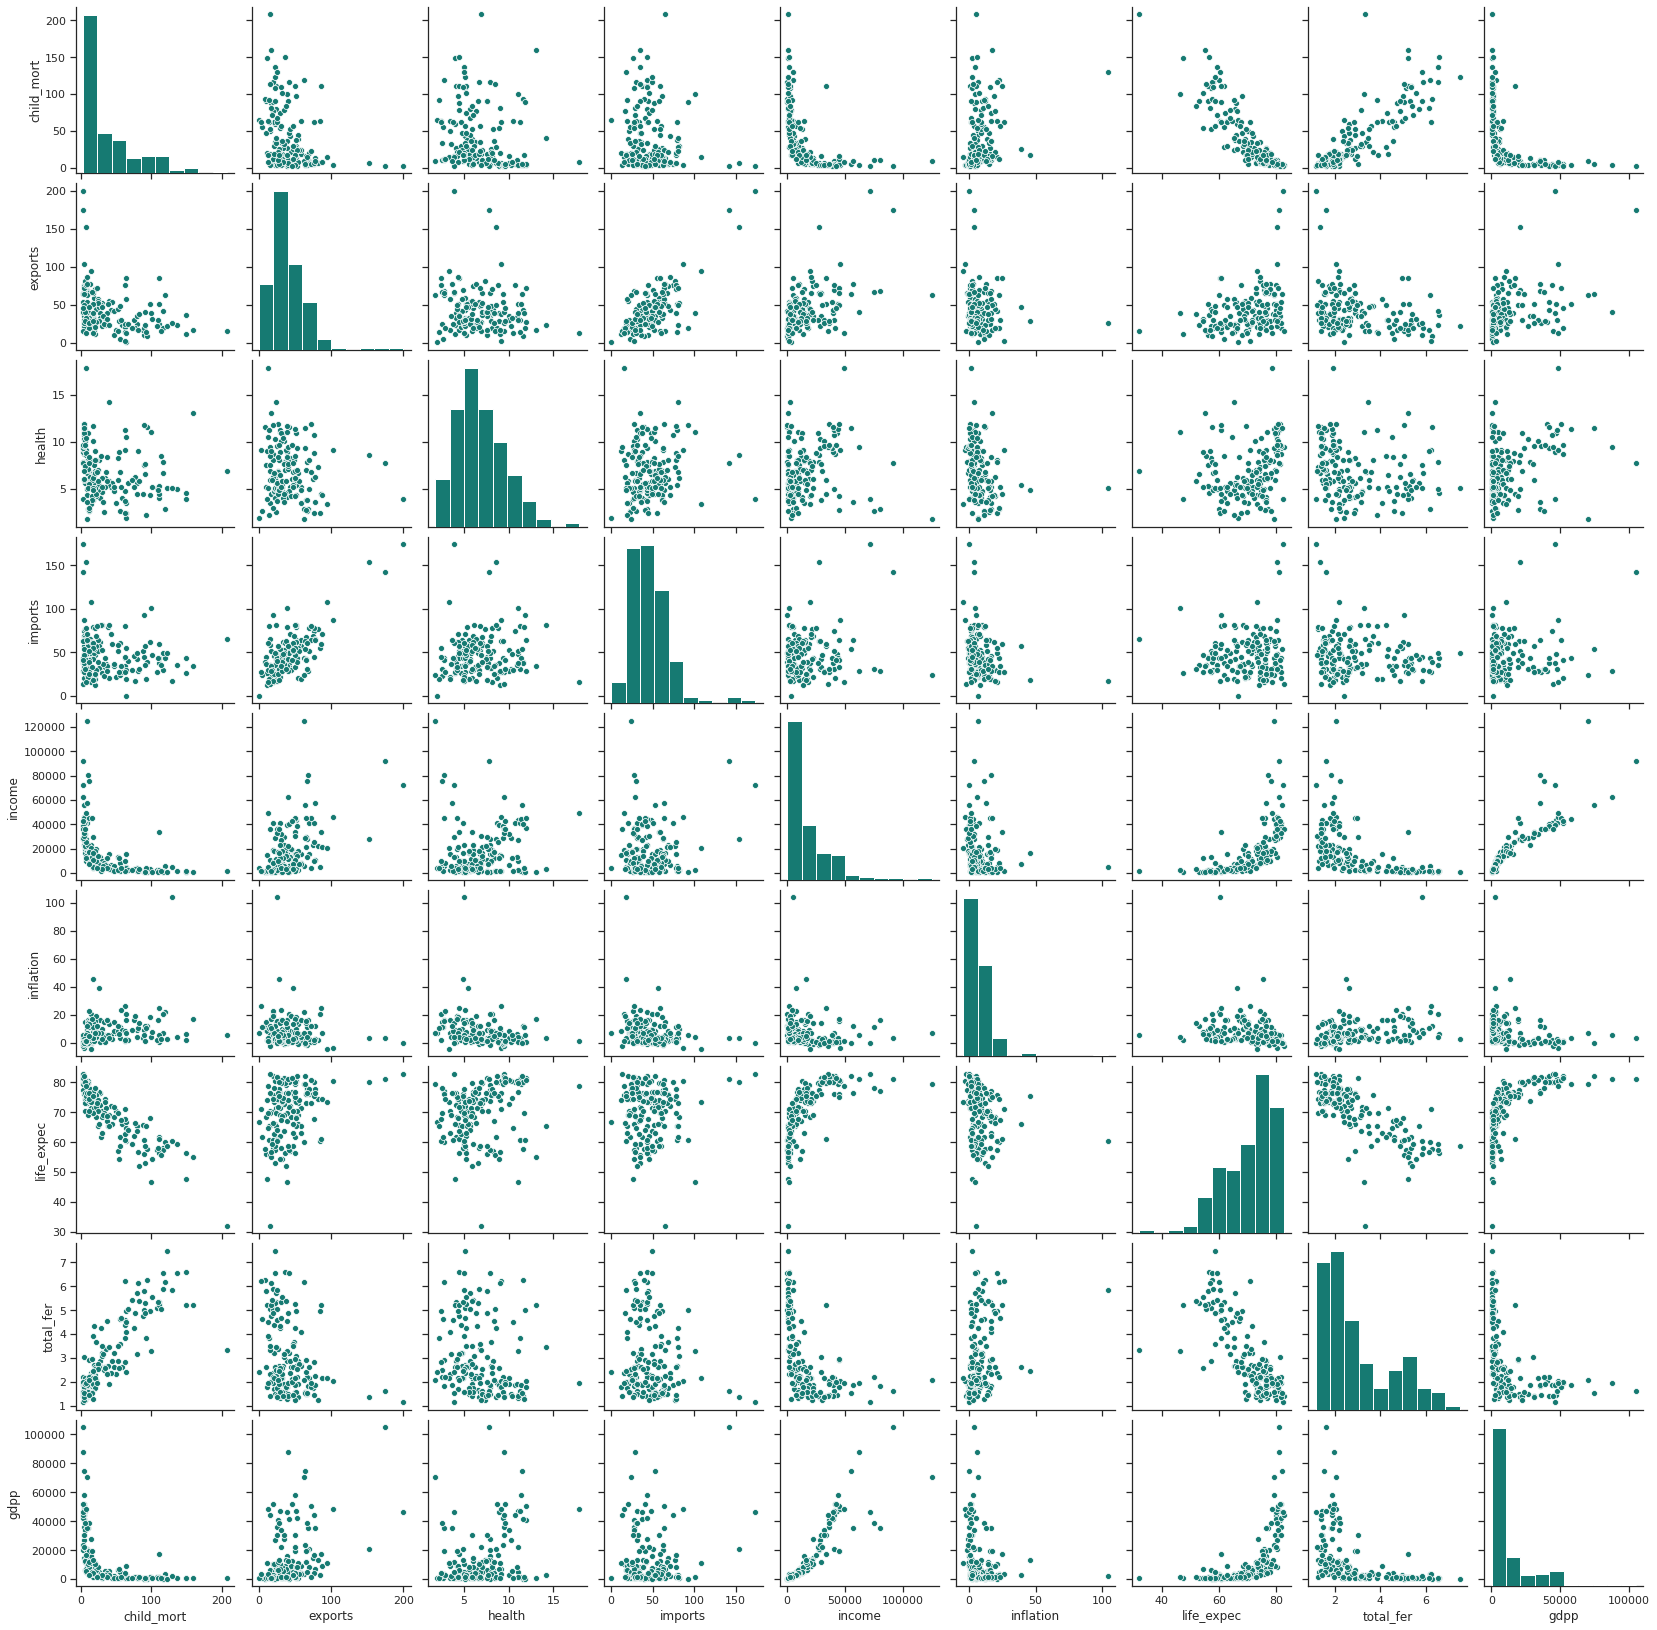

In [17]:
sns.pairplot(data[columns])

In [18]:
skewed_columns = (data[columns].skew().sort_values(ascending=False))
skewed_columns = skewed_columns.loc[skewed_columns > 0.75]
skewed_columns

inflation     5.154049
exports       2.445824
income        2.231480
gdpp          2.218051
imports       1.905276
child_mort    1.450774
total_fer     0.967092
dtype: float64

In [19]:
for col in skewed_columns.index.to_list():
    data[col] = np.log1p(data[col])

In [20]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
data[columns] = sc.fit_transform(data[columns])
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.278012,-1.764313,0.279088,0.147868,-1.413035,0.565707,-1.619092,1.734817,-1.460301
1,Albania,-0.239708,-0.283872,-0.097016,0.291835,0.071660,-0.048485,0.647866,-0.944336,-0.122835
2,Algeria,0.198464,0.184161,-0.966073,-0.498946,0.285240,1.037243,0.670423,0.143564,-0.064916
3,Angola,1.531191,0.908223,-1.448071,0.065136,-0.353257,1.336981,-1.179234,1.872702,-0.221309
4,Antigua and Barbuda,-0.648481,0.437193,-0.286894,0.642228,0.605586,-0.823427,0.704258,-0.472520,0.608135


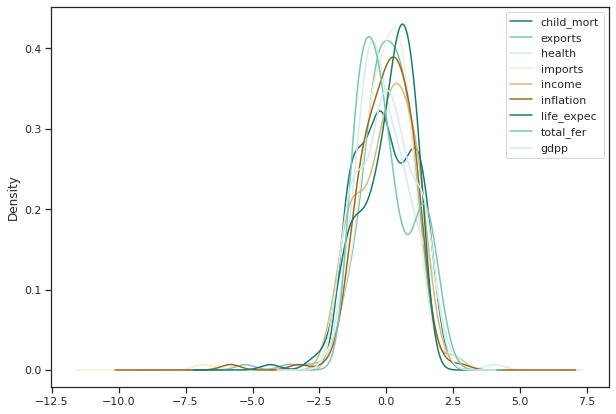

In [21]:
plt.rcParams['figure.figsize'] = (10,7)
data[columns].plot(kind='kde')

In [22]:
data[data['inflation'].isnull()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
43,Czech Republic,-1.518617,0.994977,0.388633,0.762271,0.926520,NaN,0.783207,-1.098167,0.932046
73,Ireland,-1.364504,1.666472,0.866980,1.345970,1.317711,NaN,1.110281,-0.545901,1.534070
77,Japan,-1.561534,-1.192092,0.976525,-1.979247,1.118415,NaN,1.380962,-1.237012,1.473740
131,Seychelles,-0.362895,1.525023,-1.247238,1.753974,0.659334,NaN,0.320793,-0.436530,0.526605


In [23]:
data[data['country'] == 'Japan']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,-1.561534,-1.192092,0.976525,-1.979247,1.118415,NaN,1.380962,-1.237012,1.47374


In [24]:
data['inflation'].fillna(0,inplace=True,axis=0)

In [25]:
for x in data['country']:
    if x in ['Czech Republic','Japan','Ireland','Seychelles']:
        print(x)

Czech Republic
Ireland
Japan
Seychelles


In [26]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION
km = KMeans(n_clusters=3,random_state=42)
km = km.fit(data[columns])

In [27]:
data['kmeans'] = km.fit_predict(data[columns])

In [28]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans
0,Afghanistan,1.278012,-1.764313,0.279088,0.147868,-1.413035,0.565707,-1.619092,1.734817,-1.460301,0
1,Albania,-0.239708,-0.283872,-0.097016,0.291835,0.071660,-0.048485,0.647866,-0.944336,-0.122835,2
2,Algeria,0.198464,0.184161,-0.966073,-0.498946,0.285240,1.037243,0.670423,0.143564,-0.064916,2
3,Angola,1.531191,0.908223,-1.448071,0.065136,-0.353257,1.336981,-1.179234,1.872702,-0.221309,0
4,Antigua and Barbuda,-0.648481,0.437193,-0.286894,0.642228,0.605586,-0.823427,0.704258,-0.472520,0.608135,1


In [29]:
data[['gdpp','kmeans']].groupby('kmeans').size().to_frame().rename(columns={0:'gdpp'})

,gdpp
kmeans,
0,49
1,46
2,72


In [30]:
data.sort_values(by='kmeans',ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans
0,Afghanistan,1.278012,-1.764313,0.279088,0.147868,-1.413035,0.565707,-1.619092,1.734817,-1.460301,0
94,Malawi,1.281042,-0.585657,-0.082410,-0.308455,-1.777371,0.782602,-1.968722,1.514534,-1.584682,0
93,Madagascar,0.939671,-0.450638,-1.112133,0.069361,-1.532894,0.504277,-1.100286,1.176220,-1.655162,0
88,Liberia,1.268863,-0.843696,1.820021,1.471117,-2.092281,0.108473,-1.100286,1.381190,-1.810927,0
87,Lesotho,1.369427,0.222438,1.564416,1.630714,-1.094134,-0.109580,-2.713097,0.427566,-0.959633,0
...,...,...,...,...,...,...,...,...,...,...,...
89,Libya,-0.239708,0.985833,-1.071967,0.030983,0.963181,0.924687,0.625310,-0.229689,0.602630,2
22,Brazil,-0.085594,-1.670097,0.801253,-2.223587,0.380676,0.466446,0.411020,-0.788287,0.550931,2
23,Brunei,-0.632295,1.026560,-1.451722,-0.704820,1.780873,1.070199,0.738094,-0.748085,1.318813,2
120,Philippines,0.337408,0.037830,-1.170557,-0.222536,-0.395849,-0.096678,-0.175457,0.333754,-0.559117,2


In [31]:
km_list = list()

for clust in range(2,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data[columns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

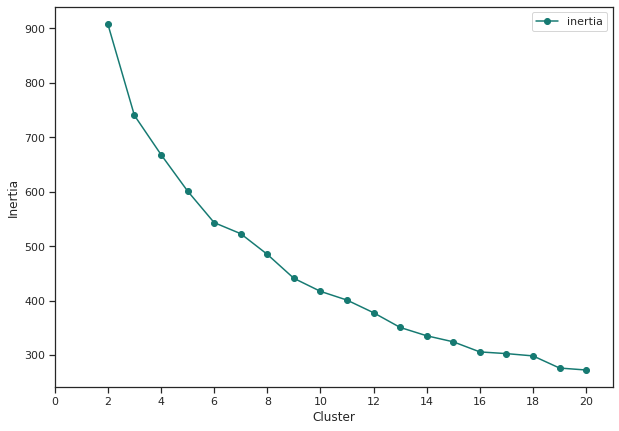

In [32]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [92]:
from sklearn.decomposition import PCA
pca =  PCA(n_components=2)
pca_trans = pca.fit_transform(data[columns])
df_pca = pd.DataFrame(pca_trans)
df_pca.head()

,0,1
0,-3.603139,0.183567
1,0.672198,0.154306
2,-0.149595,0.407700
3,-2.398715,-1.127805
4,1.566130,-0.513661


In [96]:
wss=[]
for i in range(2,20):
    model=KMeans(n_clusters=i)
    model.fit(df_pca)
    wss.append(model.inertia_)

In [97]:
y=wss

In [98]:
x=range(1,len(wss)+1)
x

range(1, 19)

Text(0, 0.5, 'wss')

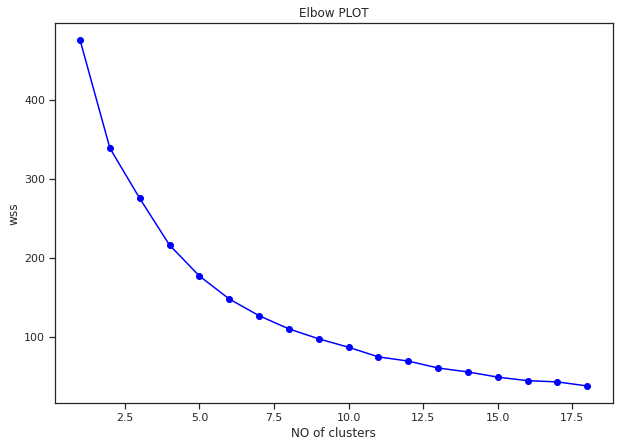

In [99]:
plt.figure(figsize=(10,7))
plt.plot(x,y,'ob-')
plt.title("Elbow PLOT")
plt.xlabel("NO of clusters")
plt.ylabel("wss")

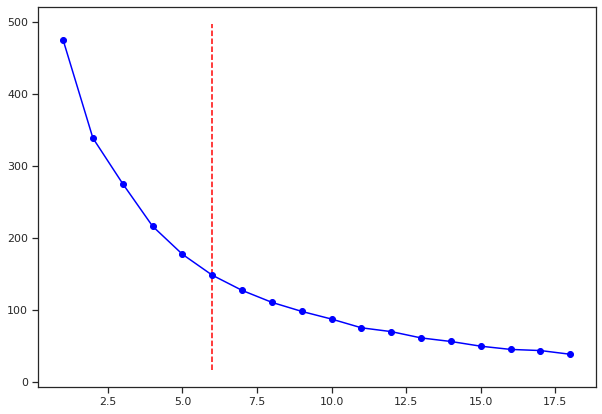

In [102]:
from kneed import KneeLocator
# point outs the knee point which is the best cluster no
kn = KneeLocator(x,y, direction='decreasing', curve='convex')
plt.plot(x,y,'ob-')
plt.vlines(kn.knee,plt.ylim()[0],plt.ylim()[1], linestyles='dashed',color='r');

In [116]:
model2=KMeans(n_clusters=7,max_iter=1000)
model2.fit(df_pca)
label2=model2.labels_

In [117]:
pred = model2.fit_predict(df_pca)
pred

array([1, 5, 6, 1, 5, 6, 6, 0, 0, 6, 0, 5, 1, 5, 5, 4, 5, 1, 2, 2, 5, 2,
       6, 0, 5, 1, 1, 2, 1, 0, 2, 1, 1, 0, 6, 6, 1, 1, 2, 0, 1, 0, 4, 4,
       0, 6, 6, 6, 5, 2, 1, 4, 2, 0, 0, 2, 1, 5, 0, 1, 0, 5, 2, 1, 1, 2,
       1, 4, 0, 2, 6, 6, 2, 4, 0, 0, 5, 0, 5, 6, 1, 2, 0, 2, 2, 4, 5, 2,
       1, 5, 4, 4, 5, 1, 1, 5, 5, 1, 4, 2, 5, 2, 5, 2, 5, 2, 1, 3, 2, 1,
       4, 0, 1, 1, 0, 5, 1, 5, 5, 6, 2, 0, 0, 0, 5, 6, 1, 2, 5, 1, 5, 5,
       1, 4, 4, 4, 2, 2, 0, 0, 6, 5, 1, 5, 0, 4, 1, 1, 5, 1, 1, 2, 5, 6,
       2, 1, 5, 4, 0, 0, 6, 2, 2, 6, 2, 1, 1], dtype=int32)

In [118]:
df2_centers=model2.cluster_centers_
df2_centers

array([[ 2.50289034,  0.94676795],
       [-3.04154454, -0.03489143],
       [-0.98563758, -0.72570997],
       [-3.52143821,  7.83655048],
       [ 3.01417523, -1.16578924],
       [ 0.97552991, -0.45669681],
       [ 0.11559055,  1.22291287]])

In [122]:
final_df=pd.concat([pd.DataFrame(df_pca),pd.DataFrame({'Kmeans Clusters':label2})],axis=1)
final_df

,0,1,Kmeans Clusters
0,-3.603139,0.183567,1
1,0.672198,0.154306,0
2,-0.149595,0.407700,6
3,-2.398715,-1.127805,5
4,1.566130,-0.513661,0
...,...,...,...
162,-1.035022,-1.052630,5
163,0.134722,1.708642,6
164,-0.049432,-1.525695,5
165,-2.067612,0.070866,1


In [123]:
np.unique(final_df['Kmeans Clusters'])

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

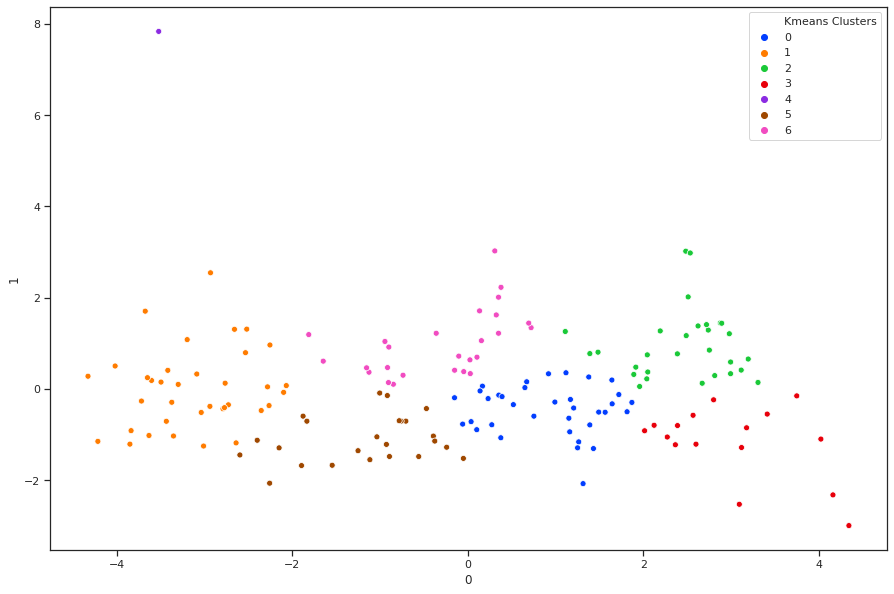

In [132]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=final_df[0],y=final_df[1], hue='Kmeans Clusters',data=final_df,palette='bright')

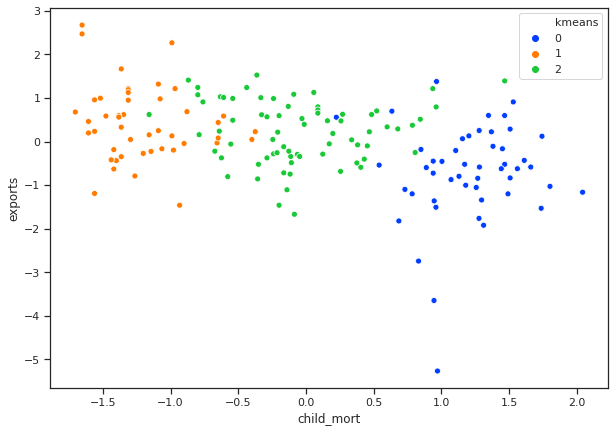

In [156]:
sns.scatterplot(x=data['child_mort'],y=data['exports'],hue='kmeans',data=data,palette='bright',markers='v')

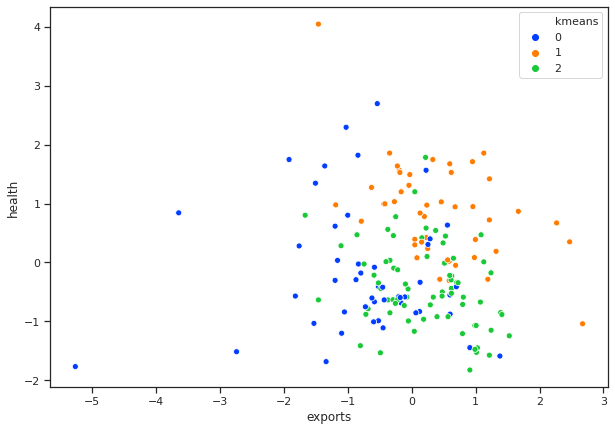

In [157]:
sns.scatterplot(x=data['exports'],y=data['health'],hue='kmeans',data=data,palette='bright',markers='v')

In [129]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[columns])
data['agglom'] = ag.fit_predict(data[columns])

In [34]:
data[['gdpp','agglom']].groupby('agglom').size().to_frame().rename(columns={0:'gdpp'})

,gdpp
agglom,
0,47
1,69
2,51


In [35]:
data[['gdpp','agglom','kmeans']].groupby(['agglom','kmeans']).size().to_frame().rename(columns={0:'gdpp'})

gdpp
agglom kmeans      
0      0         46
       2          1
1      0          3
       2         66
2      1         46
       2          5

In [38]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,agglom
0,Afghanistan,1.278012,-1.764313,0.279088,0.147868,-1.413035,0.565707,-1.619092,1.734817,-1.460301,0,0
1,Albania,-0.239708,-0.283872,-0.097016,0.291835,0.071660,-0.048485,0.647866,-0.944336,-0.122835,2,1
2,Algeria,0.198464,0.184161,-0.966073,-0.498946,0.285240,1.037243,0.670423,0.143564,-0.064916,2,1
3,Angola,1.531191,0.908223,-1.448071,0.065136,-0.353257,1.336981,-1.179234,1.872702,-0.221309,0,0
4,Antigua and Barbuda,-0.648481,0.437193,-0.286894,0.642228,0.605586,-0.823427,0.704258,-0.472520,0.608135,1,2


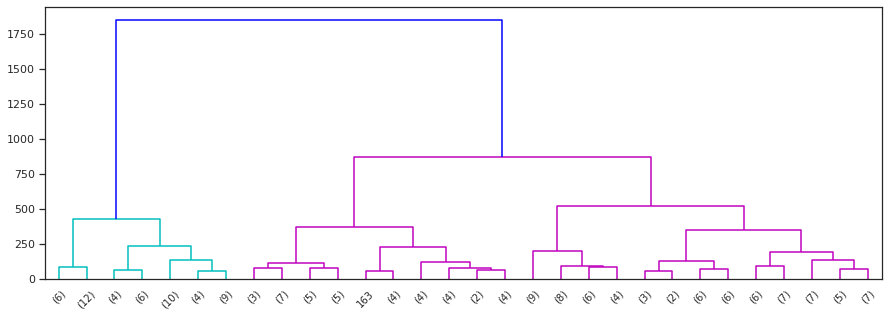

In [39]:
from scipy.cluster import hierarchy

tree=  hierarchy.linkage(ag.children_,method='ward')
fig,ax =  plt.subplots(figsize=(15,5))
hierarchy.set_link_color_palette(['c','m','y','k'])
den = hierarchy.dendrogram(tree, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')

In [40]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [41]:
db = DBSCAN(eps=1.4,min_samples=10,n_jobs=-1)
db.fit(data[columns])

DBSCAN(eps=1.4, min_samples=10, n_jobs=-1)

In [42]:
db.get_params()

{'algorithm': 'auto',
 'eps': 1.4,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 10,
 'n_jobs': -1,
 'p': None}

In [43]:
data['DBSCAN'] = db.labels_

In [44]:
data['DBSCAN'].value_counts()

-1    82
 0    45
 1    21
 3    13
 2     6
Name: DBSCAN, dtype: int64

In [45]:
data[['gdpp','DBSCAN']].groupby('DBSCAN').size().to_frame().rename(columns={0:'gdpp'})

,gdpp
DBSCAN,
-1,82
0,45
1,21
2,6
3,13


In [46]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,agglom,DBSCAN
0,Afghanistan,1.278012,-1.764313,0.279088,0.147868,-1.413035,0.565707,-1.619092,1.734817,-1.460301,0,0,-1
1,Albania,-0.239708,-0.283872,-0.097016,0.291835,0.071660,-0.048485,0.647866,-0.944336,-0.122835,2,1,0
2,Algeria,0.198464,0.184161,-0.966073,-0.498946,0.285240,1.037243,0.670423,0.143564,-0.064916,2,1,0
3,Angola,1.531191,0.908223,-1.448071,0.065136,-0.353257,1.336981,-1.179234,1.872702,-0.221309,0,0,-1
4,Antigua and Barbuda,-0.648481,0.437193,-0.286894,0.642228,0.605586,-0.823427,0.704258,-0.472520,0.608135,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,0.258411,0.472899,-0.571711,0.439323,-0.918936,-0.446458,-0.852161,0.556415,-0.336823,2,1,-1
163,Venezuela,-0.213864,-0.257766,-0.695862,-1.529588,0.486145,2.001406,0.546361,-0.180255,0.675862,2,1,-1
164,Vietnam,0.057883,1.125958,0.008877,1.207206,-0.576146,0.782602,0.286958,-0.640383,-0.884089,2,1,-1
165,Yemen,0.849258,-0.182023,-0.597272,-0.334500,-0.577965,1.384772,-0.344633,1.211428,-0.884089,0,0,-1


In [47]:
X = data.drop(['kmeans','agglom','DBSCAN','country'],axis=1)
y = data['kmeans']

In [48]:
X.isnull().all()

child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

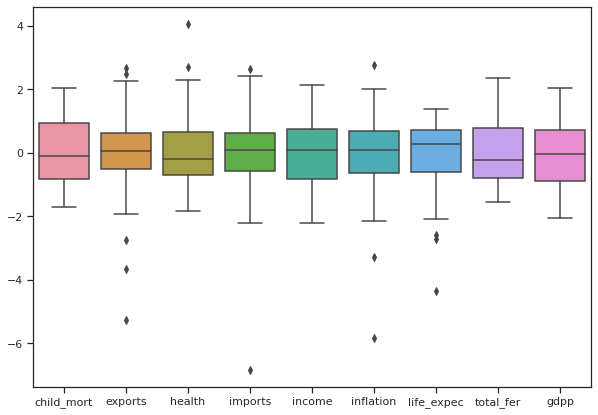

In [49]:
sns.boxplot(data=X)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.033)

In [51]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred = forest.predict(X_test)

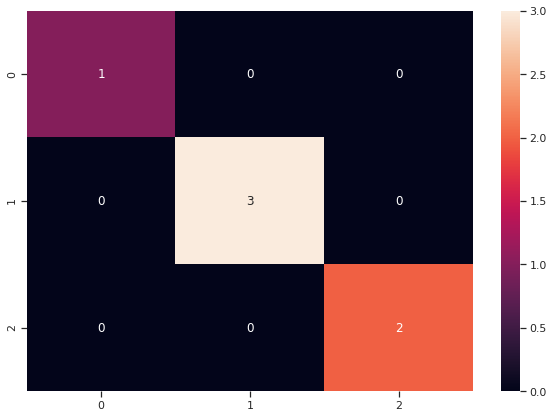

In [53]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [54]:
confusion_matrix(y_pred,y_test).ravel()

array([1, 0, 0, 0, 3, 0, 0, 0, 2])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

1.0

In [56]:
sample = X_train[X_train.index == 8]
sample

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
8,-1.346931,0.616703,1.527901,0.261638,1.271788,-1.076147,1.121559,-1.178331,1.508877


In [57]:
data[data.index == 8]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,agglom,DBSCAN
8,Austria,-1.346931,0.616703,1.527901,0.261638,1.271788,-1.076147,1.121559,-1.178331,1.508877,1,2,1


In [58]:
test_sample = forest.predict(sample)
test_sample

array([1], dtype=int32)

In [84]:
labels = np.unique(data['kmeans'])
labels

array([0, 1, 2], dtype=int32)